# Project 3: Temperatures Dashboard

In this project, we will analyze a dataset with temperatures from 10 cities around the world extracting some interesting insights and developing two charts about them. We will be using once more Pandas and Matplotlib, but this time we will convert a column into timestamp date type, so we will be able to do some time sereis analysis and plots.

Data extracted from: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities (with some cleaning and modifications).


### Project Tasks:

- `3.1.` Load the dataset from the defined data_path and display the first 5 rows.

- `3.2.` Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

- `3.3.` How many different countries are there? Provide a list of them.

- `3.4.` What is the minimum and maximum timestamps?

- `3.5.` What is the global minimum and maximum temperature? Find the city and the date of each of them.

- `3.6.` For a given city and a range of dates (start and end):
  - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of that city during the selected time period.
  - Make sure that all plots include a title, axis labels and a legend.

- `3.7.` Now repeat the previous question but for a list of cities instead of a single one:
  - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
  - Make sure that all plots include a title, axis labels and a legend.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

data_path = "/Users/victormorenorequena/Downloads/EAE/Programming/eae_ipld_project/data/cities_temperatures.csv"


temps_df = pd.read_csv(data_path)


temps_df.head()

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000


In [3]:

temps_df["Date"] = pd.to_datetime(temps_df["Date"]).dt.date

In [4]:

# Ex 3.2: Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.
temps_df["AvgTemperatureCelsius"] = (temps_df["AvgTemperatureFahrenheit"] - 32) * 5/9
temps_df.head()

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year,AvgTemperatureCelsius
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000,26.388889
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000,26.000000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000,23.500000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000,26.111111
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000,25.055556


In [5]:
# Ex 3.3: How many different cities are there? Provide a list of them.

unique_cities_list = temps_df['City'].unique()
num_unique_cities = len(unique_cities_list)

print(f"There are {num_unique_cities} different cities.")
print("List of unique cities:")
print(unique_cities_list)

There are 10 different cities.
List of unique cities:
['Buenos Aires' 'Canberra' 'Bogota' 'Cairo' 'Munich' 'Calcutta' 'Tokyo'
 'Dakar' 'Capetown' 'Washington']


In [6]:
# Ex 3.4: What are the minimum and maximum dates?
min_date = temps_df['Date'].min()
max_date = temps_df['Date'].max()

print(f"The minimum date is {min_date}")
print(f"The maximum date is {max_date}")

The minimum date is 2000-01-01
The maximum date is 2019-12-31


In [7]:
# Ex 3.5: What are the global minimum and maximum temperatures? Find the city and the date of each of them.

min_temp = temps_df['AvgTemperatureCelsius'].min()
max_temp = temps_df['AvgTemperatureCelsius'].max()

min_temp_row = temps_df.loc[temps_df['AvgTemperatureCelsius'] == min_temp].iloc[0]
min_temp_city = min_temp_row['City']
min_temp_date = min_temp_row['Date']

max_temp_row = temps_df.loc[temps_df['AvgTemperatureCelsius'] == max_temp].iloc[0]
max_temp_city = max_temp_row['City']
max_temp_date = max_temp_row['Date']

print(f"Global minimum temperature: {min_temp}°C")
print(f"City: {min_temp_city}, Date: {min_temp_date}")

print(f"\nGlobal maximum temperature: {max_temp}°C")
print(f"City: {max_temp_city}, Date: {max_temp_date}")

Global minimum temperature: -16.77777777777778°C
City: Munich, Date: 2000-01-25

Global maximum temperature: 37.888888888888886°C
City: Cairo, Date: 2019-05-23


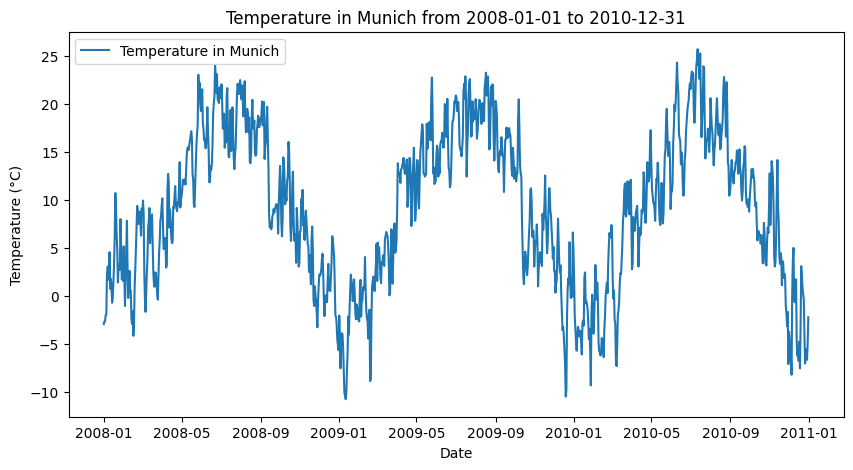

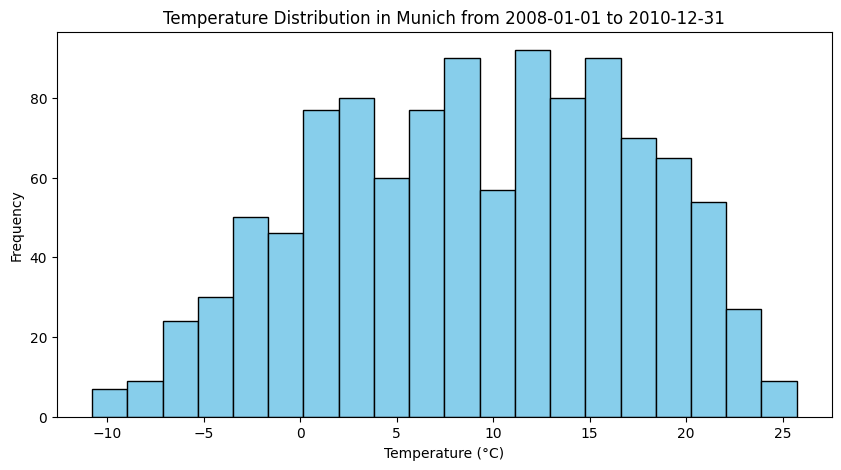

In [8]:
# Ex 3.6: For a given city and a range of dates (start and end):
#   - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of that city during the selected time period.
#   - Make sure that all plots include a title, axis labels and a legend.

city = "Munich"
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

city_df = temps_df[temps_df['City'] == city]

city_df_period = city_df[(city_df['Date'] >= start_date) & (city_df['Date'] <= end_date)]

plt.figure(figsize=(10, 5))
plt.plot(city_df_period['Date'], city_df_period['AvgTemperatureCelsius'], label=f'Temperature in {city}')
plt.title(f'Temperature in {city} from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(city_df_period['AvgTemperatureCelsius'], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Temperature Distribution in {city} from {start_date} to {end_date}')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

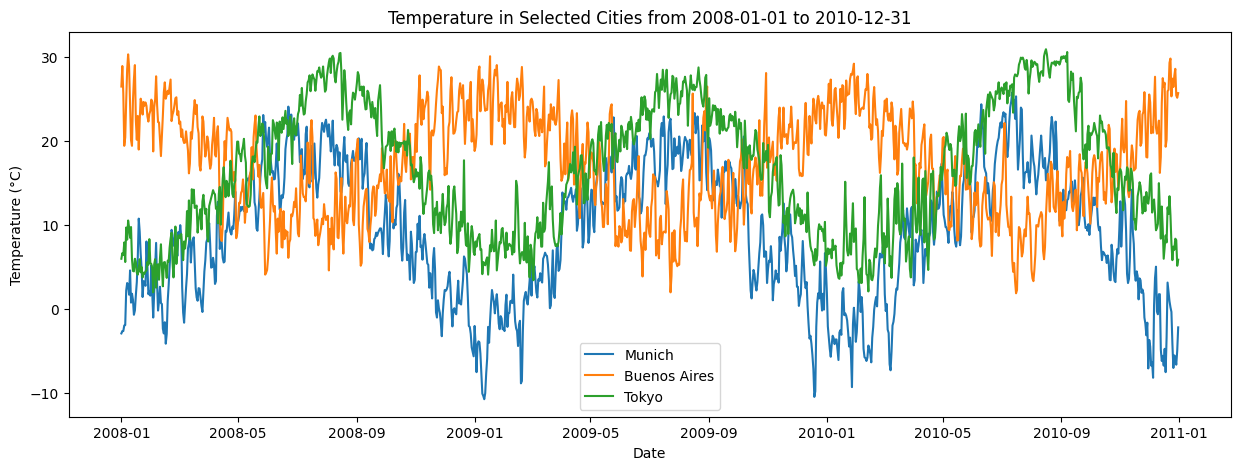

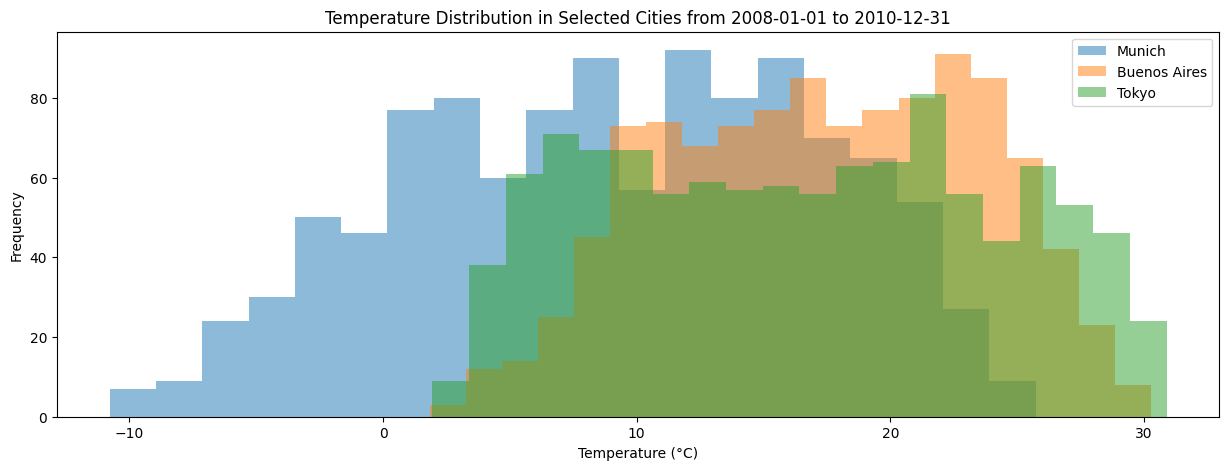

In [10]:
# Ex 3.7: Now repeat the previous question but for a list of cities:
#   - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
#   - Make sure that all plots include a title, axis labels and a legend.

selected_cities = ["Munich", "Buenos Aires", "Tokyo"]
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

plt.figure(figsize=(15, 5))

for city in selected_cities:
    city_df = temps_df[temps_df['City'] == city]
    city_df_period = city_df[(city_df['Date'] >= start_date) & (city_df['Date'] <= end_date)]
    plt.plot(city_df_period['Date'], city_df_period['AvgTemperatureCelsius'], label=city)

plt.title(f'Temperature in Selected Cities from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))

for city in selected_cities:
    city_df = temps_df[temps_df['City'] == city]
    city_df_period = city_df[(city_df['Date'] >= start_date) & (city_df['Date'] <= end_date)]
    plt.hist(city_df_period['AvgTemperatureCelsius'], bins=20, alpha=0.5, label=city)

plt.title(f'Temperature Distribution in Selected Cities from {start_date} to {end_date}')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.show()